<a href="https://colab.research.google.com/github/hiteshkandy/BioPhyChem---Polymer-Aggregation-Simulation/blob/main/BPC_assign_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import math
from google.colab import drive
import shutil

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Defining Classes

Bead as a class

In [4]:
class Bead:
  def __init__(self,x,y):
    self.x=x
    self.y=y

Polymer as a class with beads as attributes

In [5]:
class Polymer:
  def __init__(self,bead1,bead2,bead3,bead4):
    self.a=bead1
    self.b=bead2
    self.c=bead3
    self.d=bead4

#Movement Function Definitions

Movement of bead 'a' defined as an end move

In [6]:
def end_move_a(polymer) :

  polymer_coords_list=[]
  new_coords=[]

  for z in polymer_list:
    for bead_attr in ['a', 'b', 'c', 'd']:
        bead = getattr(z, bead_attr)
        polymer_coords_list.append((bead.x, bead.y))

  if polymer.a.x==polymer.b.x:
    if (polymer.a.x+1,polymer.b.y) not in polymer_coords_list and polymer.a.x+1<40 and (polymer.a.x-1,polymer.b.y) not in polymer_coords_list and polymer.a.x-1>=0:
      new_coords=random.choice([(polymer.a.x+1,polymer.b.y),(polymer.a.x-1,polymer.b.y)])
    elif (polymer.a.x+1,polymer.b.y) not in polymer_coords_list and polymer.a.x+1<40:
      new_coords.append(polymer.a.x+1)
      new_coords.append(polymer.b.y)
    elif (polymer.a.x-1,polymer.b.y) not in polymer_coords_list and polymer.a.x-1>=0:
      new_coords.append(polymer.a.x-1)
      new_coords.append(polymer.b.y)

  elif polymer.a.y==polymer.b.y:
    if (polymer.b.x,polymer.a.y+1) not in polymer_coords_list and polymer.a.y+1<40 and (polymer.b.x,polymer.a.y-1) not in polymer_coords_list and polymer.a.y-1>=0:
      new_coords=random.choice([(polymer.b.x,polymer.a.y+1),(polymer.b.x,polymer.a.y-1)])
    elif (polymer.b.x,polymer.a.y+1) not in polymer_coords_list and polymer.a.y+1<40:
      new_coords.append(polymer.b.x)
      new_coords.append(polymer.a.y+1)
    elif (polymer.b.x,polymer.a.y-1) not in polymer_coords_list and polymer.a.y-1>=0:
      new_coords.append(polymer.b.x)
      new_coords.append(polymer.a.y-1)

  # print(a.x,a.y)
  # print(new_coords)
  return new_coords

Movement of bead 'd' defined as an end move

In [7]:
def end_move_d(polymer) :

  polymer_coords_list=[]
  new_coords=[]

  for z in polymer_list:
    for bead_attr in ['a', 'b', 'c', 'd']:
        bead = getattr(z, bead_attr)
        polymer_coords_list.append((bead.x, bead.y))

  if polymer.d.x==polymer.c.x:
    if (polymer.d.x + 1, polymer.c.y) not in polymer_coords_list and polymer.d.x + 1 < 40 and \
    (polymer.d.x - 1, polymer.c.y) not in polymer_coords_list and polymer.d.x - 1 >= 0:
      new_coords = random.choice(([(polymer.d.x + 1, polymer.c.y), (polymer.d.x - 1, polymer.c.y)]))
    elif [polymer.d.x+1,polymer.c.y] not in polymer_coords_list and polymer.d.x+1<40:
      new_coords.append(polymer.d.x+1)
      new_coords.append(polymer.c.y)
    elif [polymer.d.x-1,polymer.c.y] not in polymer_coords_list and polymer.d.x-1>=0:
      new_coords.append(polymer.d.x-1)
      new_coords.append(polymer.c.y)

  elif polymer.d.y==polymer.c.y:
    if (polymer.c.x, polymer.d.y + 1) not in polymer_coords_list and polymer.d.y + 1 < 40 and \
    (polymer.c.x, polymer.d.y - 1) not in polymer_coords_list and polymer.d.y - 1 >= 0:
      new_coords = random.choice(([(polymer.c.x, polymer.d.y + 1), (polymer.c.x, polymer.d.y - 1)]))
    elif [polymer.c.x,polymer.d.y+1] not in polymer_coords_list and polymer.d.y+1<40:
      new_coords.append(polymer.c.x)
      new_coords.append(polymer.d.y+1)
    elif [polymer.c.x,polymer.d.y-1] not in polymer_coords_list and polymer.d.y-1>=0:
      new_coords.append(polymer.c.x)
      new_coords.append(polymer.d.y-1)
  # print(d.x,d.y)
  # print(new_coords)
  return new_coords

Movement of bead 'b' defined as a corner move

In [8]:
def corner_move_b(polymer):
  polymer_coords_list=[]
  new_coords=[]

  for z in polymer_list:
    for bead_attr in ['a', 'b', 'c', 'd']:
        bead = getattr(z, bead_attr)
        polymer_coords_list.append((bead.x, bead.y))

  if polymer.b.x==polymer.c.x and polymer.b.y==polymer.a.y and (polymer.a.x,polymer.c.y) not in polymer_coords_list:
    new_coords=[polymer.a.x,polymer.c.y]

  elif polymer.b.x==polymer.a.x and polymer.b.y==polymer.c.y and (polymer.c.x,polymer.a.y) not in polymer_coords_list:
    new_coords=[polymer.c.x,polymer.a.y]

  # print(b.x,b.y)
  # print(new_coords)
  return new_coords

Movement of bead 'c' defined as a corner move

In [9]:
def corner_move_c(polymer):
  polymer_coords_list=[]
  new_coords=[]

  for z in polymer_list:
    for bead_attr in ['a', 'b', 'c', 'd']:
        bead = getattr(z, bead_attr)
        polymer_coords_list.append((bead.x, bead.y))

  if polymer.c.x==polymer.b.x and polymer.c.y==polymer.d.y and (polymer.d.x,polymer.b.y) not in polymer_coords_list :
    new_coords=[polymer.d.x,polymer.b.y]

  elif polymer.c.x==polymer.d.x and polymer.c.y==polymer.b.y and (polymer.b.x,polymer.d.y) not in polymer_coords_list:
    new_coords=[polymer.b.x,polymer.d.y]
  # print(c.x,c.y)
  # print(new_coords)
  return new_coords

In [10]:
def a_move(polymer_list,score):
    a_list=bead_list_maker(polymer_list,'a') #making list of all bead coords of one type initially
    # print(f'a_list={a_list}')
    for z in polymer_list:
      e_initial=energy_score(a_list,score)
      bead = getattr(z, 'a')
      new_coords_a=end_move_a(z)
      if new_coords_a!=[]:
        a_list = [(new_coords_a[0], new_coords_a[1]) if item == (bead.x, bead.y) else item for item in a_list]
        e_modified=energy_score(a_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_a[0]
          bead.y=new_coords_a[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_a[0]
            bead.y=new_coords_a[1]
    print('a_move')

In [11]:
def b_move(polymer_list,score):
    b_list=bead_list_maker(polymer_list,'b') #making list of all bead coords of one type initially
    # print(f'b_list={b_list}')
    for z in polymer_list:
      e_initial=energy_score(b_list,score)
      bead = getattr(z, 'b')
      new_coords_b=corner_move_b(z)
      if new_coords_b!=[]:
        b_list = [(new_coords_b[0], new_coords_b[1]) if item == (bead.x, bead.y) else item for item in b_list]
        e_modified=energy_score(b_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_b[0]
          bead.y=new_coords_b[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_b[0]
            bead.y=new_coords_b[1]
    print('b_move')

In [12]:
def c_move(polymer_list,score):
    c_list=bead_list_maker(polymer_list,'c') #making list of all bead coords of one type initially
    # print(f'c_list={c_list}')
    for z in polymer_list:
      e_initial=energy_score(c_list,score)
      bead = getattr(z, 'c')
      new_coords_c=corner_move_c(z)
      if new_coords_c!=[]:
        c_list = [(new_coords_c[0], new_coords_c[1]) if item == (bead.x, bead.y) else item for item in c_list]
        e_modified=energy_score(c_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_c[0]
          bead.y=new_coords_c[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_c[0]
            bead.y=new_coords_c[1]
    print('c_move')

In [13]:
def d_move(polymer_list,score):
    d_list=bead_list_maker(polymer_list,'d') #making list of all bead coords of one type initially
    # print(f'd_list={d_list}')
    for z in polymer_list:
      e_initial=energy_score(d_list,score)
      bead = getattr(z, 'd')
      new_coords_d=end_move_d(z)
      if new_coords_d!=[]:
        d_list = [(new_coords_d[0], new_coords_d[1]) if item == (bead.x, bead.y) else item for item in d_list]
        e_modified=energy_score(d_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_d[0]
          bead.y=new_coords_d[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_d[0]
            bead.y=new_coords_d[1]
    print('d_move')

#Energy Function Definition
Scores interactions between beads in the provided list at a dist=1 according to score inputs (1,2,5)

In [14]:
def energy_score(points_list,score):
  energy=0
  dist_list=[]
  for i in range(len(points_list)):
    for j in range(i+1,len(points_list)):
      dist_list.append(math.dist(points_list[i],points_list[j]))
  for dist in dist_list:
    if dist == 1 :
      energy=energy-score
  return energy

List constructer function for specific bead types

In [15]:
def bead_list_maker(polymer_list,bead_type):
  bead_list=[]
  for z in polymer_list:
    bead = getattr(z, bead_type)
    bead_list.append((bead.x,bead.y))
  return bead_list

#Main Function
Update function for each frame

In [16]:
def main_rand(polymer_list,score):
  function_names = [a_move, b_move, c_move, d_move]

  # Randomly choose a function
  selected_function = random.choice(function_names)

  # Call the chosen function with appropriate arguments
  selected_function(polymer_list, score)


#Initialiser Fucntion

In [18]:
def initialiser(score):
    a=Bead(15,10)
    b=Bead(15,10)
    c=Bead(15,10)
    d=Bead(15,10)

    e=Bead(21,score)
    f=Bead(22,score)
    g=Bead(23,score)
    h=Bead(24,score)

    i=Bead(score,22)
    j=Bead(score,23)
    k=Bead(score,24)
    l=Bead(score,25)

    m=Bead(10,36)
    n=Bead(10,37)
    o=Bead(10,38)
    p=Bead(10,39)

    q=Bead(12,12)
    r=Bead(12,13)
    s=Bead(12,14)
    t=Bead(12,15)

    u=Bead(20,20)
    v=Bead(21,20)
    w=Bead(22,20)
    x=Bead(22,21)
    polymer1=Polymer(a,b,c,d)
    polymer2=Polymer(e,f,g,h)
    polymer3=Polymer(i,j,k,l)
    polymer4=Polymer(m,n,o,p)
    polymer5=Polymer(q,r,s,t)
    polymer6=Polymer(u,v,w,x)
    polymer_list=[polymer1, polymer2, polymer3, polymer4, polymer5, polymer6]
    return polymer_list

#Animation loop
1. Initialises beads and polymers with coordinate set
1. Calls the main function for specfied number of iterations/frames

2. Generates animation at specified fps, interval

3. Saves animation(mp4) and final frame(png) to drive

Streaming output truncated to the last 5000 lines.
d_move
a_move
c_move
d_move
d_move
a_move
d_move
d_move
d_move
d_move
c_move
c_move
a_move
c_move
c_move
a_move
c_move
a_move
d_move
b_move
c_move
b_move
a_move
a_move
d_move
d_move
c_move
b_move
a_move
a_move
c_move
b_move
d_move
d_move
a_move
b_move
b_move
d_move
a_move
a_move
b_move
a_move
c_move
c_move
a_move
d_move
c_move
d_move
d_move
b_move
d_move
a_move
c_move
d_move
c_move
d_move
b_move
c_move
b_move
a_move
d_move
d_move
c_move
a_move
c_move
d_move
d_move
c_move
b_move
b_move
b_move
b_move
c_move
b_move
b_move
c_move
b_move
b_move
a_move
b_move
a_move
b_move
b_move
d_move
d_move
d_move
a_move
b_move
b_move
d_move
a_move
c_move
d_move
c_move
a_move
a_move
b_move
c_move
b_move
d_move
a_move
c_move
b_move
a_move
c_move
b_move
c_move
c_move
d_move
d_move
d_move
d_move
d_move
a_move
d_move
a_move
d_move
a_move
c_move
d_move
c_move
a_move
d_move
a_move
a_move
d_move
b_move
d_move
d_move
c_move
a_move
c_move
d_move
c_move
b_move
d_mo

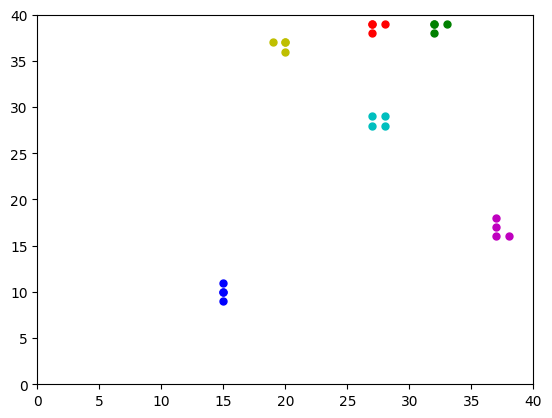

In [25]:
for score in [5]:
    polymer_list=initialiser(score)
  # for i in range(5):
    # Set up the animation
    fig, ax = plt.subplots()
    ax.set_xlim(0, 40)
    ax.set_ylim(0, 40)

    # Create a list to hold line objects for each polymer
    lines = []
    colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Colors for 6 polymers

    def update(frame):
        x_data = []
        y_data = []
        colors_data = []
        main_rand(polymer_list,score)

        for i, polymer in enumerate(polymer_list):
            for bead in ['a', 'b', 'c', 'd']:
                x_data.append(getattr(polymer, bead).x)
                y_data.append(getattr(polymer, bead).y)
                colors_data.append(colors[i])  # Assign color for each bead

        # Update the data for each line object
        for i, line in enumerate(lines):
            line.set_data(x_data[4*i:4*(i+1)], y_data[4*i:4*(i+1)])

        return lines

    # Create line objects with assigned colors
    for i in range(6):
        line, = ax.plot([], [], colors[i] + 'o', markersize=5)
        lines.append(line)

    anim = animation.FuncAnimation(fig, update, frames=10000, interval=50)
    anim.save(f'Q1_pol_sim_score_{score}.mp4', writer='ffmpeg', fps=50)

    # Save the plot to a file
    # plt.savefig(f'/content/plot_pol_aggr__e_score_{score}.png')  # Save the plot as a PNG file

    # Move the saved file to Google Drive
    # shutil.move(f'/content/plot_pol_aggr__e_score_{score}.png', f'/content/drive/My Drive/plot_pol_aggr_{i}_e_score_{score}.png')  # Change the destination path as needed

    plt.show()


# Backup-single colour

In [ ]:
def main(score):

    a_list=bead_list_maker(polymer_list,'a') #making list of all bead coords of one type initially
    # print(f'a_list={a_list}')
    for z in polymer_list:
      e_initial=energy_score(a_list,score)
      bead = getattr(z, 'a')
      new_coords_a=end_move_a(z)
      if new_coords_a!=[]:
        a_list = [(new_coords_a[0], new_coords_a[1]) if item == (bead.x, bead.y) else item for item in a_list]
        e_modified=energy_score(a_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_a[0]
          bead.y=new_coords_a[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_a[0]
            bead.y=new_coords_a[1]

      # print(f'{polymer} a={bead.x,bead.y}')

    b_list=bead_list_maker(polymer_list,'b') #making list of all bead coords of one type initially
    # print(f'b_list={b_list}')
    for z in polymer_list:
      e_initial=energy_score(b_list,score)
      bead = getattr(z, 'b')
      new_coords_b=corner_move_b(z)
      if new_coords_b!=[]:
        b_list = [(new_coords_b[0], new_coords_b[1]) if item == (bead.x, bead.y) else item for item in b_list]
        e_modified=energy_score(b_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_b[0]
          bead.y=new_coords_b[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_b[0]
            bead.y=new_coords_b[1]

      # print(f'{polymer} b={bead.x,bead.y}')

    c_list=bead_list_maker(polymer_list,'c') #making list of all bead coords of one type initially
    # print(f'c_list={c_list}')
    for z in polymer_list:
      e_initial=energy_score(c_list,score)
      bead = getattr(z, 'c')
      new_coords_c=corner_move_c(z)
      if new_coords_c!=[]:
        c_list = [(new_coords_c[0], new_coords_c[1]) if item == (bead.x, bead.y) else item for item in c_list]
        e_modified=energy_score(c_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_c[0]
          bead.y=new_coords_c[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_c[0]
            bead.y=new_coords_c[1]

      # print(f'{polymer} c={bead.x,bead.y}')

    d_list=bead_list_maker(polymer_list,'d') #making list of all bead coords of one type initially
    # print(f'd_list={d_list}')
    for z in polymer_list:
      e_initial=energy_score(d_list,score)
      bead = getattr(z, 'd')
      new_coords_d=end_move_d(z)
      if new_coords_d!=[]:
        d_list = [(new_coords_d[0], new_coords_d[1]) if item == (bead.x, bead.y) else item for item in d_list]
        e_modified=energy_score(d_list,score)

        if e_modified<=e_initial:
          bead.x=new_coords_d[0]
          bead.y=new_coords_d[1]
        else:
          if math.exp(-(e_modified-e_initial))<=random.random():
            bead.x=new_coords_d[0]
            bead.y=new_coords_d[1]

      # print(f'{polymer} d={bead.x,bead.y}')